In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Platinum.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,933.5,930.5,933.5,930.5
1,2018-01-02,931.0,945.5,946.5,931.0
2,2018-01-03,945.0,957.0,961.0,940.5
3,2018-01-04,955.0,964.0,966.5,945.0
4,2018-01-05,963.0,969.5,970.5,959.5


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

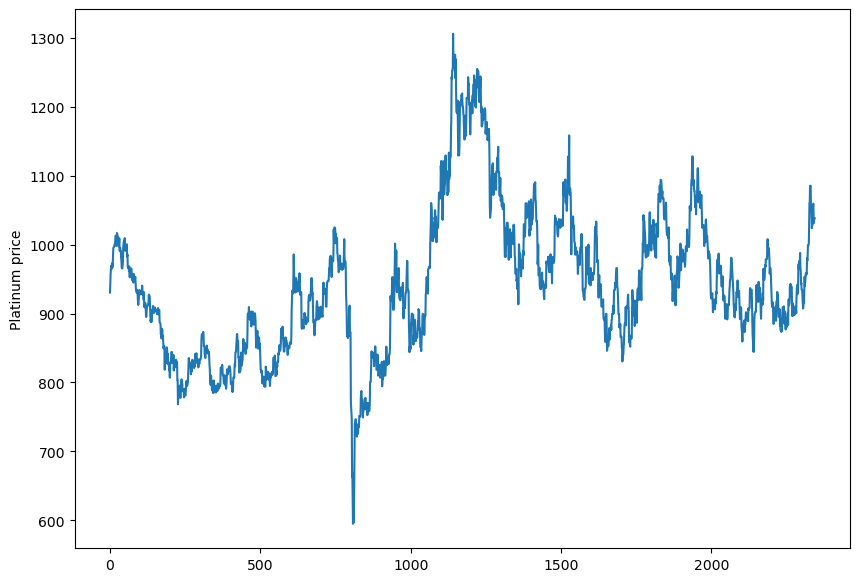

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Platinum price")
plt.show()


In [6]:
t = .7
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.13378141023815146
c:  828.2627196756885


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1047.664232
1,1047.798014
2,1047.931795
3,1048.065577
4,1048.199358
...,...
699,1141.177438
700,1141.311220
701,1141.445001
702,1141.578782


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 15.48794722031814
Mean Squared Error (MSE): 24896.164776359357
Root Mean Squared Error (RMSE): 157.78518554148027


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[1141.84634527 1141.98012668 1142.11390809 1142.2476895  1142.38147091
 1142.51525233 1142.64903374 1142.78281515 1142.91659656 1143.05037797
 1143.18415938 1143.31794079 1143.4517222  1143.58550361 1143.71928502
 1143.85306643 1143.98684784 1144.12062925 1144.25441066 1144.38819207
 1144.52197348 1144.65575489 1144.7895363  1144.92331771 1145.05709912
 1145.19088053 1145.32466194 1145.45844335 1145.59222476 1145.72600617
 1145.85978758 1145.99356899 1146.1273504  1146.26113181 1146.39491322
 1146.52869463 1146.66247604 1146.79625745 1146.93003886 1147.06382027
 1147.19760168 1147.33138309 1147.4651645  1147.59894591 1147.73272732
 1147.86650873 1148.00029014 1148.13407156 1148.26785297 1148.40163438
 1148.53541579 1148.6691972  1148.80297861 1148.93676002 1149.07054143
 1149.20432284 1149.33810425 1149.47188566 1149.60566707 1149.73944848
 1149.87322989 1150.0070113  1150.14079271 1150.27457412 1150.40835553
 1150.54213694 1150.67591835 1

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

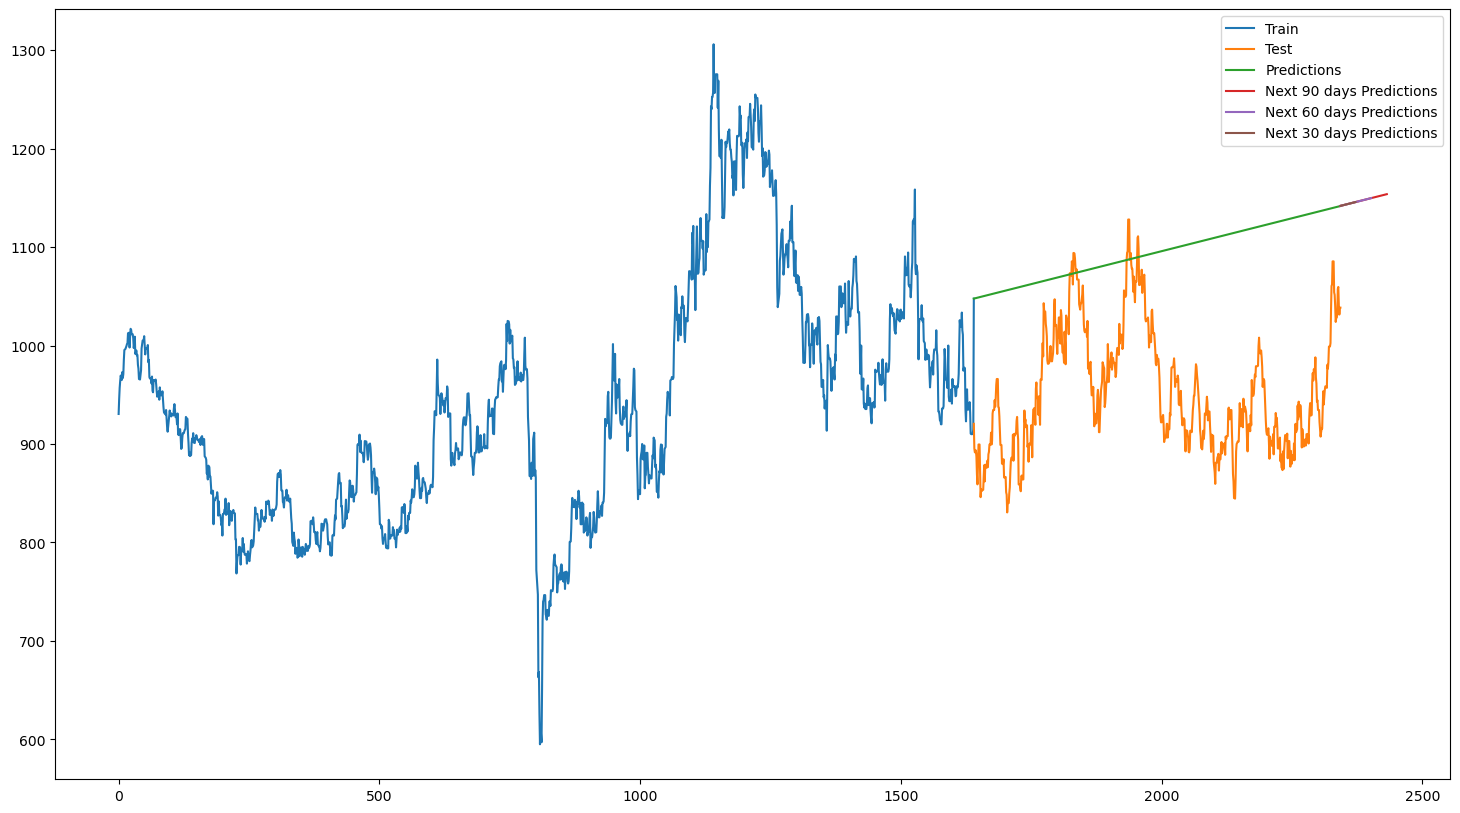

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()